In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting parameters

%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Establish nba data set of all player season from past two seasons (ending 2016, 2017)

nba_data = pd.read_csv('/Users/michaelkrysko/Desktop/nba_data.csv')
nba_data = nba_data[nba_data['Pos'] != 'PF-C']
nba_data.columns = [c.replace('/','') for c in nba_data.columns]
nba_data.columns = [c.replace('%','p') for c in nba_data.columns]

In [4]:
# Set the index of the dataframe to player name

nba_data = pd.concat([nba_data, nba_data['Player'].str.split('\\', expand=True)], axis=1)
nba_data = nba_data.rename(columns={'Player': 'player_code', 0: 'player', 1: 'code'})
nba_data = nba_data.set_index('player')

In [5]:
# Create dataset of qualified nba players
# To qualify for end-of-year stats categories, a player must play in 70% of his team's games (min 58)

qualified = nba_data[nba_data.G >= 58]

In [6]:
# Create all star data set

all_stars = nba_data[nba_data.AS > 0]

In [7]:
# take a look at the difference in descriptive stats between the three data sets

nba_data.describe()

,Age,G,GS,MP,FG,FGA,FGp,3P,3PA,3Pp,...,USGp,OWS,DWS,WS,WS48,OBPM,DBPM,BPM,VORP,AS
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,925.000000,...,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,26.494792,54.245833,25.590625,1236.548958,197.735417,434.876042,0.441755,46.434375,130.553125,0.283891,...,18.663333,1.353750,1.256563,2.608854,0.079852,-1.283125,-0.312396,-1.594063,0.623750,0.053125
std,4.363080,24.568645,29.067899,844.664371,170.455266,366.378244,0.094765,54.869357,144.392811,0.148944,...,5.382613,2.038433,1.116619,2.890554,0.078166,3.119548,2.067385,3.884154,1.405767,0.224400
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.300000,0.000000,-2.100000,-0.473000,-22.400000,-10.500000,-26.900000,-1.400000,0.000000
25%,23.000000,36.000000,1.000000,461.750000,55.000000,126.000000,0.400000,2.000000,9.000000,0.241000,...,14.900000,0.000000,0.400000,0.400000,0.040000,-2.800000,-1.600000,-3.500000,-0.100000,0.000000
50%,26.000000,62.000000,11.000000,1216.500000,164.000000,361.500000,0.440000,26.500000,82.000000,0.330000,...,18.100000,0.700000,1.000000,1.800000,0.083000,-1.200000,-0.300000,-1.300000,0.100000,0.000000
75%,29.000000,75.000000,52.000000,1957.000000,294.250000,640.250000,0.485000,75.250000,214.250000,0.372000,...,21.625000,2.100000,1.900000,3.825000,0.121000,0.200000,1.000000,0.700000,1.000000,0.000000
max,40.000000,82.000000,82.000000,3125.000000,824.000000,1941.000000,1.000000,402.000000,886.000000,1.000000,...,41.700000,13.800000,6.000000,17.900000,0.480000,12.400000,12.100000,15.600000,12.400000,1.000000


In [8]:
all_stars.describe()

,Age,G,GS,MP,FG,FGA,FGp,3P,3PA,3Pp,...,USGp,OWS,DWS,WS,WS48,OBPM,DBPM,BPM,VORP,AS
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,27.568627,74.352941,74.215686,2551.450980,581.470588,1245.294118,0.470098,131.431373,355.156863,0.340118,...,28.456863,6.331373,3.478431,9.794118,0.182961,3.974510,0.796078,4.768627,4.443137,1.0
std,3.251184,6.611576,6.591855,278.108131,118.695131,261.915352,0.049684,87.854711,209.739112,0.085479,...,4.797343,3.024400,1.172402,3.349890,0.058604,3.018731,2.038525,3.503227,2.483083,0.0
min,22.000000,53.000000,53.000000,1778.000000,272.000000,577.000000,0.358000,0.000000,2.000000,0.000000,...,15.300000,-0.900000,0.500000,-0.400000,-0.010000,-2.100000,-3.300000,-2.500000,-0.200000,1.0
25%,26.000000,72.000000,72.000000,2442.500000,522.000000,1063.000000,0.443000,74.500000,227.000000,0.321500,...,26.000000,4.050000,2.600000,7.300000,0.147000,1.500000,-0.400000,2.550000,2.650000,1.0
50%,27.000000,75.000000,75.000000,2620.000000,591.000000,1312.000000,0.463000,117.000000,328.000000,0.359000,...,29.100000,6.000000,3.500000,9.700000,0.177000,3.500000,1.000000,4.100000,4.000000,1.0
75%,30.000000,79.500000,79.000000,2744.500000,656.000000,1426.000000,0.491500,189.500000,474.500000,0.387500,...,31.250000,8.400000,4.300000,12.550000,0.222500,6.300000,2.300000,7.100000,6.200000,1.0
max,37.000000,82.000000,82.000000,3125.000000,824.000000,1941.000000,0.714000,402.000000,886.000000,0.454000,...,41.700000,13.800000,6.000000,17.900000,0.318000,12.400000,5.000000,15.600000,12.400000,1.0


In [9]:
qualified.describe()

,Age,G,GS,MP,FG,FGA,FGp,3P,3PA,3Pp,...,USGp,OWS,DWS,WS,WS48,OBPM,DBPM,BPM,VORP,AS
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,532.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,26.740741,72.803704,39.925926,1828.288889,297.498148,650.401852,0.458248,70.472222,196.720370,0.308286,...,19.332593,2.199074,1.891111,4.086852,0.101902,-0.111667,0.055185,-0.054630,1.104815,0.092593
std,4.214055,6.959889,30.015612,570.094054,155.546430,331.336843,0.060427,60.217487,155.207867,0.126836,...,5.323764,2.309748,1.063858,3.003380,0.055616,2.348859,1.709612,2.841887,1.691147,0.290129
min,19.000000,58.000000,0.000000,531.000000,45.000000,86.000000,0.305000,0.000000,0.000000,0.000000,...,8.100000,-3.300000,0.000000,-2.100000,-0.049000,-5.100000,-4.300000,-6.300000,-1.400000,0.000000
25%,24.000000,67.000000,9.000000,1366.750000,183.000000,394.250000,0.420000,22.750000,73.000000,0.291500,...,15.500000,0.700000,1.100000,2.000000,0.066000,-1.600000,-1.100000,-1.925000,0.000000,0.000000
50%,26.000000,74.000000,39.000000,1813.500000,261.000000,583.500000,0.447500,61.000000,180.000000,0.343500,...,18.550000,1.700000,1.700000,3.500000,0.096000,-0.400000,0.000000,-0.300000,0.700000,0.000000
75%,29.000000,79.000000,72.000000,2272.250000,390.250000,859.000000,0.486250,106.000000,296.250000,0.375000,...,22.300000,3.100000,2.500000,5.400000,0.133000,0.800000,1.225000,1.325000,1.700000,0.000000
max,40.000000,82.000000,82.000000,3125.000000,824.000000,1941.000000,0.714000,402.000000,886.000000,1.000000,...,41.700000,13.800000,6.000000,17.900000,0.318000,12.400000,5.800000,15.600000,12.400000,1.000000


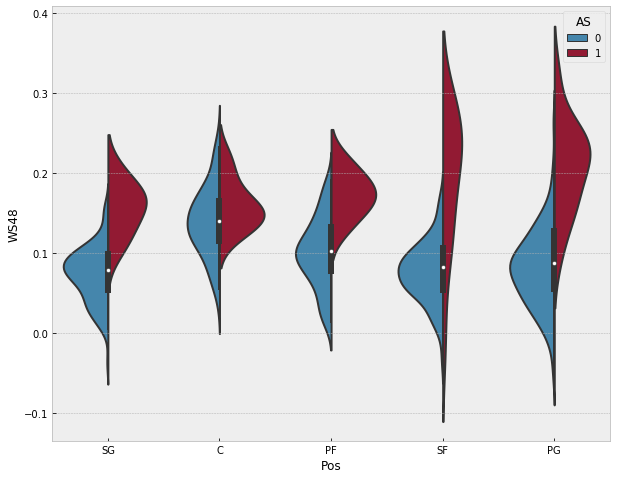

In [10]:
# Visualize dispersion and shapes of data segmented by position and all-star selection

sns.violinplot(x="Pos", y="WS48", hue= 'AS',
               data=qualified,
               split=True);

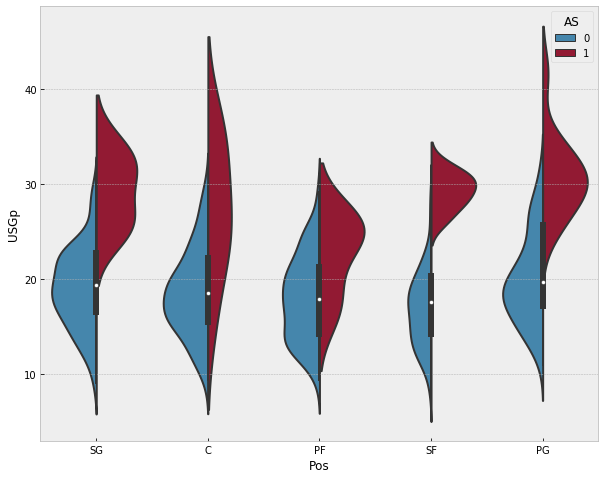

In [11]:
sns.violinplot(x= 'Pos', y = 'USGp', hue = 'AS',
               data = qualified,
               split = True);

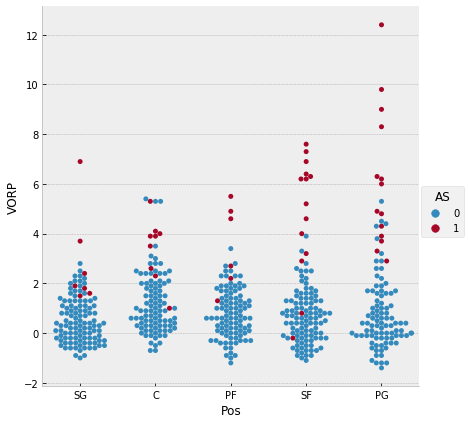

In [12]:
factor = sns.factorplot(x="Pos", y="VORP", hue="AS",
               data=qualified,
               kind="swarm", size = 6, aspect = 1);
factor.savefig("factor_plot.png")

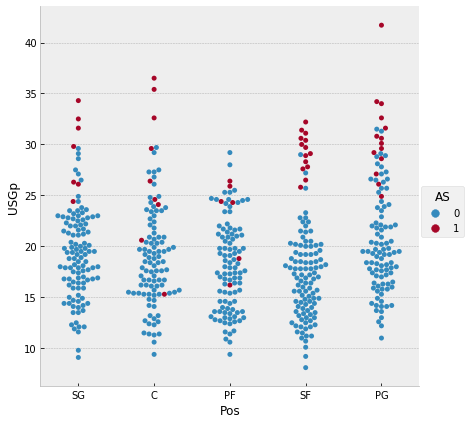

In [13]:
factor = sns.factorplot(x="Pos", y="USGp", hue="AS",
               data=qualified,
               kind="swarm", size = 6, aspect = 1);
factor.savefig("usgp.png")

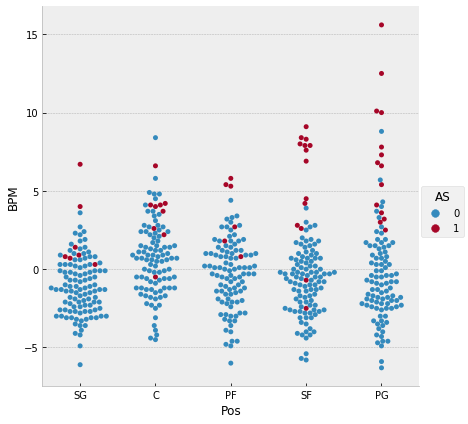

In [14]:
factor = sns.factorplot(x="Pos", y="BPM", hue="AS",
               data=qualified,
               kind="swarm", size = 6, aspect = 1);
factor.savefig("bpm.png")

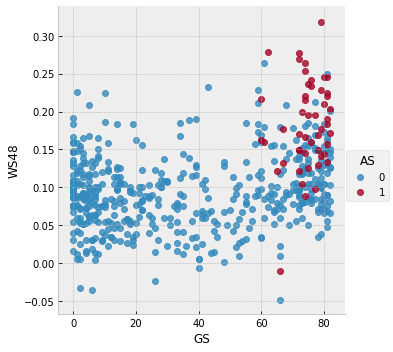

In [15]:
sns.lmplot(x = 'GS', y = 'WS48', hue = 'AS', data = qualified, fit_reg = False);

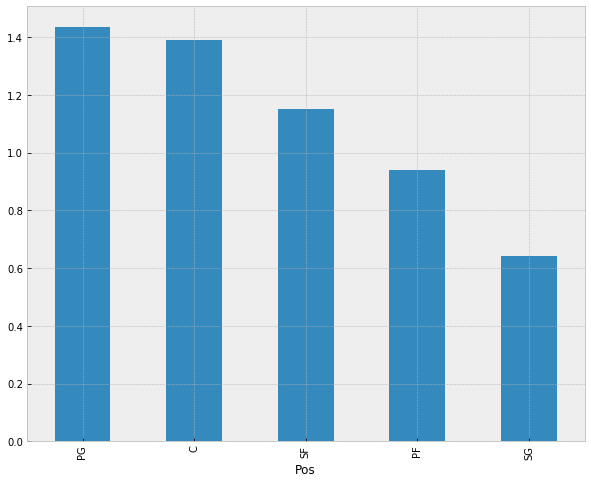

In [16]:
qualified.groupby('Pos').VORP.mean().sort_values(ascending = False).plot(kind = 'bar');

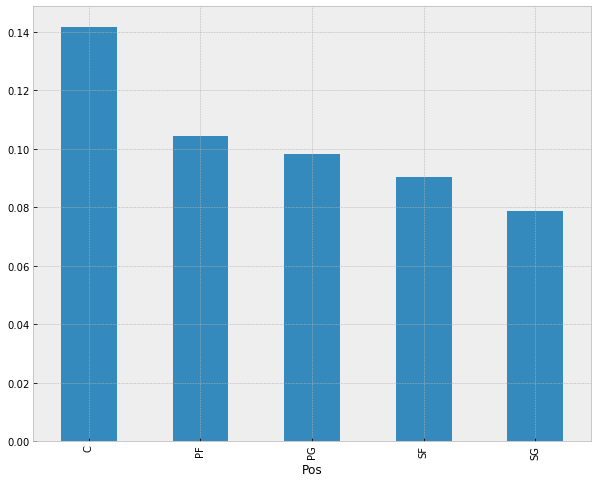

In [17]:
qualified.groupby('Pos').WS48.mean().sort_values(ascending = False).plot(kind = 'bar');

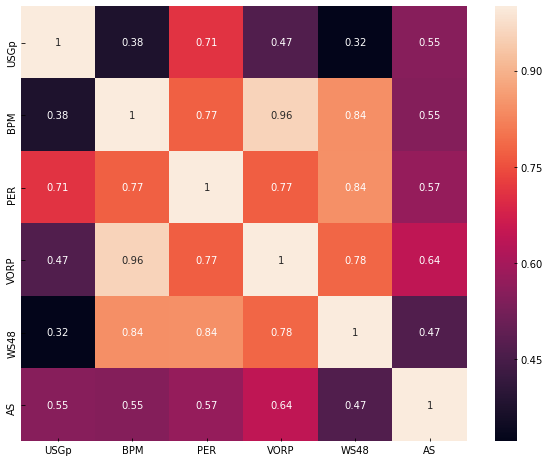

In [18]:
# Visualizations to perform EDA to determine what vars will be included in the model

vars_ = ['USGp','BPM','PER','VORP','WS48','AS']
sns.heatmap(qualified[vars_].corr(), annot= True);

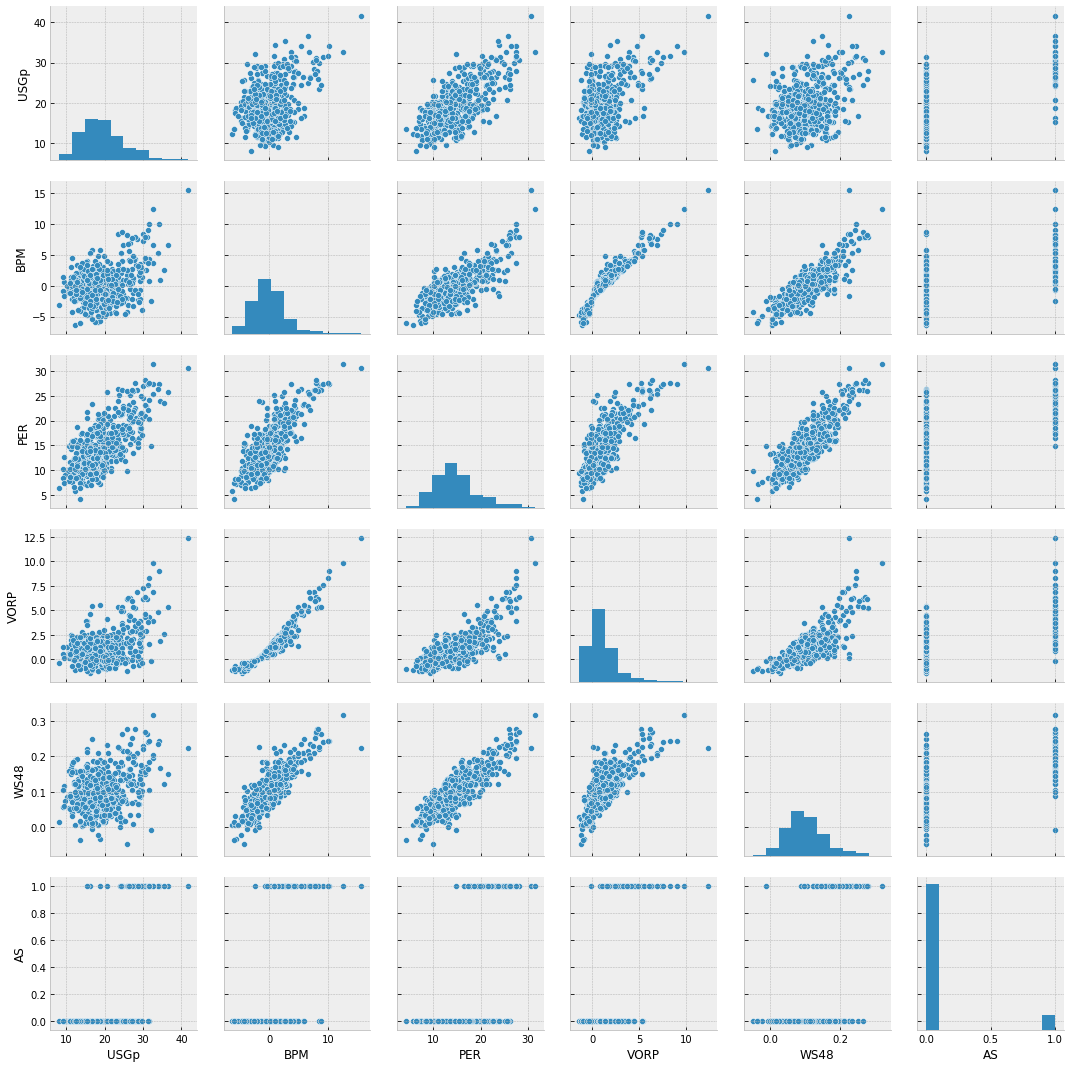

In [19]:
# Visualize advanced stats relationships
# Mainly looking at bottom row, which shows data segmented by all-stars and non-all-stars

sns.pairplot(qualified[vars_]);

In [20]:
# Build, train, and test model using nba players who have qualified on games played
# Using five advanced player stats (USG%, BPM, PER, VORP, WS48)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

feature_cols = ['USGp','BPM','PER','VORP','WS48']

logreg = LogisticRegression()

X = qualified[feature_cols]
y = qualified.AS

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 20)

In [21]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [22]:
# Test accuracy score

accuracy_score(y_pred,y_test)

0.99259259259259258

In [23]:
# Check confusion matrix because significant portion of data is not all stars, meaning accuracy score could be misleading
# No false positives, and 6 false negatives
# Accept these results because my model is more selective. Would rather exclude deserving than include undeserving

prob_pred = logreg.predict_proba(X_test)[:,1]
metrics.confusion_matrix(y_true=y_test, y_pred=prob_pred > .5)

array([[128,   0],
       [  1,   6]])

In [24]:
# Test how many instances you need for the model to be accurate
# N = 10k / p
# k is the number of features
# p is the smaller segment of data (51 all stars / 540 total players)

(10 * 5)/(51 / 540.0)

529.4117647058823

In [25]:
# Extract coefficients from the model

print(logreg.coef_)
logreg.intercept_

[[ 0.28664243  0.45636833 -0.37027952  0.66780128  0.00117879]]


array([-3.9193382])

In [26]:
# Write a function that uses model to automatically calculate the probability that a player will be an all-star

def allstar_pred(player):
    num = np.exp(-3.92 + (0.287 * nba_data.loc[player]['USGp']) + (0.456 * nba_data.loc[player]['BPM']) + ((-.370) * nba_data.loc[player]['PER']) + (.668 * nba_data.loc[player]['VORP']) + ((.001) * nba_data.loc[player]['WS48']))
    den = 1 + np.exp(-3.92 + (0.287 * nba_data.loc[player]['USGp']) + (0.456 * nba_data.loc[player]['BPM']) + ((-.370) * nba_data.loc[player]['PER']) + (.668 * nba_data.loc[player]['VORP']) + ((.001) * nba_data.loc[player]['WS48']))
    prob = str(round(((num / den) * 100),2))
    print(prob)

In [27]:
allstar_pred('Kobe Bryant')

18.77


In [28]:
allstar_pred('Russell Westbrook')

player
Russell Westbrook    100.00
Russell Westbrook     99.36
dtype: float64


In [29]:
allstar_pred('Kemba Walker')

player
Kemba Walker    69.56
Kemba Walker    67.98
dtype: float64


In [44]:
allstar_pred('John Wall')

player
John Wall    73.50
John Wall    70.95
dtype: float64


In [31]:
allstar_pred('Pau Gasol')

player
Pau Gasol    12.02
Pau Gasol    32.59
dtype: float64


In [32]:
allstar_pred('Karl-Anthony Towns')

player
Karl-Anthony Towns    54.10
Karl-Anthony Towns    14.79
dtype: float64


In [33]:
allstar_pred('Devin Booker')

player
Devin Booker    9.14
Devin Booker    2.83
dtype: float64


In [34]:
allstar_pred('Ricky Rubio')

player
Ricky Rubio    2.55
Ricky Rubio    4.98
dtype: float64


In [35]:
allstar_pred('Andrew Wiggins')

player
Andrew Wiggins    3.44
Andrew Wiggins    3.76
dtype: float64


In [36]:
allstar_pred('Alex Len')

player
Alex Len    0.59
Alex Len    0.85
dtype: float64


In [37]:
allstar_pred('Damian Lillard')

player
Damian Lillard    73.82
Damian Lillard    74.55
dtype: float64


In [38]:
allstar_pred('Bradley Beal')

player
Bradley Beal    29.36
Bradley Beal     9.39
dtype: float64


In [39]:
allstar_pred('Carmelo Anthony')

player
Carmelo Anthony    12.17
Carmelo Anthony    55.37
dtype: float64
